In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram
# https://mmaelicke.github.io/scikit-gstat/_modules/skgstat/Variogram.html

In [4]:
tag = 'fcn_1'
# toy function (we will assume this is a black box) -- this is where real data would be imported
def get_stiff(X):
	num_pts = X.shape[0]	
	# fcn_1
	y =  np.sin(X[:,0])*np.sin(X[:,1]) + 1.0/10.0*X[:,0]**2.0 + np.random.normal(0,2,num_pts) + 100
	# fcn 2 
	#y = np.random.normal(0,50,num_pts) + 200 
	#y = (X[:,0] - 5.0)**2.0 + (X[:,1] - 5.0)**2.0 + np.random.normal(0,5,num_pts) + 50 + .15*X[:,0]*X[:,1]
	return y


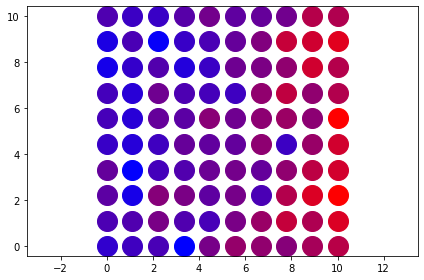

In [5]:
# get and plot data
# --> grid 
x1 = np.linspace(0,10,10)
x2 = np.linspace(0,10,10)
xv, yv = np.meshgrid(x1, x2)
num_pts = xv.shape[0]*xv.shape[1]
X = np.zeros((num_pts,2))
X[:,0] = np.reshape(xv,(-1,1))[:,0]
X[:,1] = np.reshape(yv,(-1,1))[:,0]

y = get_stiff(X)

plt.figure()
mi = np.min(y)
ma = np.max(y)

for kk in range(0,X.shape[0]):
	val = (y[kk] - mi) / (ma - mi)
	plt.plot(X[kk,0],X[kk,1],'o',color=(val, 0, 1.0 - val),markersize=20)

ax = plt.gca()
ax.axis('equal')
plt.tight_layout()
plt.savefig(tag + '_stiffness_distribution')

In [7]:
# create a variogram
V = Variogram(X, y)


/Users/emma/anaconda3/lib/python3.6/site-packages/skgstat/Variogram.py:1681: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

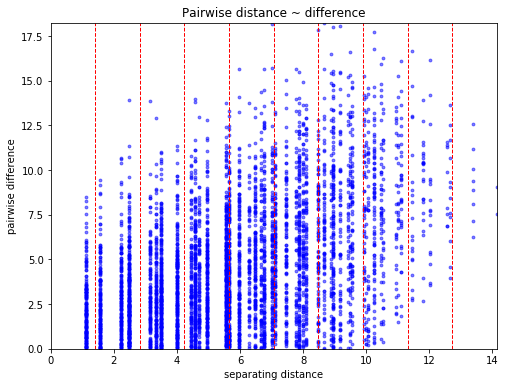

In [8]:
# plot the raw data
plt.figure()
V.distance_difference_plot()
plt.savefig(tag + '_distance_difference_plot')

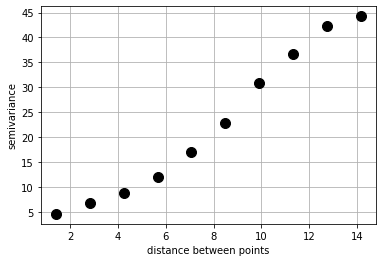

In [9]:
# plot the binned data
plt.figure()
xdata = V.bins
ydata = V.experimental
plt.plot(xdata,ydata,'ko',markersize=10)
plt.xlabel('distance between points')
plt.ylabel('semivariance')
plt.grid('on')
plt.savefig(tag + '_experimental_variogram')